Importing the Required libraires

In [207]:
import requests
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd
import geopy
from geopy.geocoders import Nominatim  
import json
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import seaborn as sns


Scrape Wikipedia to have the list of Zurich Municipalities.

In [161]:
data = requests.get('https://en.wikipedia.org/wiki/Z%C3%BCrich_District#Municipalities_(subdivisions)_of_the_district_of_Z%C3%BCrich').text
soup = BeautifulSoup(data, 'html.parser')


Name = []
District = []


for row in soup.find("table", class_="wikitable sortable").find_all('tr'):
    cells = row.find_all('td')
    if(len(cells) > 0):
        Name.append(cells[1].text.replace('\n', ''))
        District.append(cells[3].text.replace('\n', ''))  
        # replace('\n', '') remove the new line char from values


In [208]:
zurich_dist = [('Neighbourhood', Name),('District',District)]
zurich_df = pd.DataFrame.from_dict(dict(zurich_dist))
zurich_df.head(50)

,Neighbourhood,District
0,Affoltern,11
1,Albisrieden,9
2,Altstadt,1
3,Altstetten,9
4,Aussersihl,4 and 5
5,Enge,2
6,Fluntern,7
7,Hirslanden,7
8,Höngg,10
9,Hottingen,7


Adding the long and latitudes to the Municipalities using Geopy and Openstreet API.

In [209]:
nom=Nominatim(user_agent="lat_long")

In [210]:
print(zurich_df['Neighbourhood']+', Kreis '+zurich_df['District']+', Zurich')

0             Affoltern, Kreis 11, Zurich
1           Albisrieden, Kreis  9, Zurich
2              Altstadt, Kreis  1, Zurich
3            Altstetten, Kreis  9, Zurich
4     Aussersihl, Kreis  4 and  5, Zurich
5                  Enge, Kreis  2, Zurich
6              Fluntern, Kreis  7, Zurich
7            Hirslanden, Kreis  7, Zurich
8                 Höngg, Kreis 10, Zurich
9             Hottingen, Kreis  7, Zurich
10           Oberstrass, Kreis  6, Zurich
11             Oerlikon, Kreis 11, Zurich
12             Riesbach, Kreis  8, Zurich
13       Schwamendingen, Kreis 12, Zurich
14              Seebach, Kreis 11, Zurich
15          Unterstrass, Kreis  6, Zurich
16             Wiedikon, Kreis  3, Zurich
17            Wipkingen, Kreis 10, Zurich
18              Witikon, Kreis  7, Zurich
19          Wollishofen, Kreis  2, Zurich
dtype: object


SyntaxError: invalid syntax (<ipython-input-164-680f495f1a62>, line 1)

In [211]:
zurich_df["Coordinates"]=(zurich_df['Neighbourhood']+', Kreis '+zurich_df['District']+', Zurich').apply(nom.geocode)

In [212]:
zurich_df["Latitude"]=zurich_df["Coordinates"].apply(lambda x: x.latitude if x != None else None)

In [213]:
zurich_df["Longitude"]=zurich_df["Coordinates"].apply(lambda x: x.longitude if x != None else None)

In [214]:
zurich_df

,Neighbourhood,District,Coordinates,Latitude,Longitude
0,Affoltern,11,"(Affoltern, Kreis 11, Zürich, Bezirk Zürich, Z...",47.418762,8.507186
1,Albisrieden,9,"(Albisrieden, Kreis 9, Zürich, Bezirk Zürich, ...",47.374857,8.484657
2,Altstadt,1,"(Altstadt, Stadt, Winterthur, Bezirk Winterthu...",47.498731,8.726387
3,Altstetten,9,"(Altstetten, Kreis 9, Zürich, Bezirk Zürich, Z...",47.387403,8.486061
4,Aussersihl,4 and 5,"(H+ Hotel Zürich, 537, Badenerstrasse, Hard, A...",47.382450,8.500603
5,Enge,2,"(Enge, Kreis 2, Zürich, Bezirk Zürich, Zürich,...",47.361789,8.528708
6,Fluntern,7,"(Fluntern, Kreis 7, Zürich, Bezirk Zürich, Zür...",47.376777,8.558775
7,Hirslanden,7,"(Hirslanden, Kreis 7, Zürich, Bezirk Zürich, Z...",47.362948,8.564269
8,Höngg,10,"(Höngg, Kreis 10, Zürich, Bezirk Zürich, Züric...",47.401660,8.497715
9,Hottingen,7,"(Hottingen, Kreis 7, Zürich, Bezirk Zürich, Zü...",47.369680,8.555082


In [215]:
#zurich_df=zurich_df.drop(['Coordinates'], axis=1)
zurich_df.dtypes

Neighbourhood     object
District          object
Coordinates       object
Latitude         float64
Longitude        float64
dtype: object

In [216]:
#Wrong Long Lat for Altstadt manually rectifying it source https://latitude.to/articles-by-country/ch/switzerland/42802/altstadt-zurich

zurich_df['Latitude'][2] = 47.3666652
zurich_df['Longitude'][2]= 8.54249783

C:\Users\ferra\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ferra\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [231]:
zurich_df

,Neighbourhood,District,Coordinates,Latitude,Longitude
0,Affoltern,11,"(Affoltern, Kreis 11, Zürich, Bezirk Zürich, Z...",47.418762,8.507186
1,Albisrieden,9,"(Albisrieden, Kreis 9, Zürich, Bezirk Zürich, ...",47.374857,8.484657
2,Altstadt,1,"(Altstadt, Stadt, Winterthur, Bezirk Winterthu...",47.366665,8.542498
3,Altstetten,9,"(Altstetten, Kreis 9, Zürich, Bezirk Zürich, Z...",47.387403,8.486061
4,Aussersihl,4 and 5,"(H+ Hotel Zürich, 537, Badenerstrasse, Hard, A...",47.382450,8.500603
5,Enge,2,"(Enge, Kreis 2, Zürich, Bezirk Zürich, Zürich,...",47.361789,8.528708
6,Fluntern,7,"(Fluntern, Kreis 7, Zürich, Bezirk Zürich, Zür...",47.376777,8.558775
7,Hirslanden,7,"(Hirslanden, Kreis 7, Zürich, Bezirk Zürich, Z...",47.362948,8.564269
8,Höngg,10,"(Höngg, Kreis 10, Zürich, Bezirk Zürich, Züric...",47.401660,8.497715
9,Hottingen,7,"(Hottingen, Kreis 7, Zürich, Bezirk Zürich, Zü...",47.369680,8.555082


Create a map of Zurich with neighborhoods superimposed on top.

In [223]:
address = 'Zurich, Switzerland'

geolocator = Nominatim(user_agent="zurich_m")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Zurich are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Zurich are 47.3723941, 8.5423328.


In [329]:
map_zurich = folium.Map(location=[latitude, longitude], zoom_start=12)
for lat, long, neigh, district in zip(zurich_df['Latitude'], zurich_df['Longitude'], zurich_df['Neighbourhood'], zurich_df['District']):
    label = "{} : {}".format(district, neigh)
    popup = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=25,
        popup=popup,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_zurich)
    
map_zurich

Next, I am going to usethe Foursquare API to explore the neighbourhoods and segment them.

In [237]:
CLIENT_ID = 'CPZQ54HG2SZQPN5UIXWMOFFCHWHFVJLWWHIBB3UFM5POCRJ1' # your Foursquare ID
CLIENT_SECRET = 'URA4CYLW3KTZE25L1IGJGLKEDKYORN1WXNLHK543F3XDVUDM' # your Foursquare Secret
VERSION = '20201104' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CPZQ54HG2SZQPN5UIXWMOFFCHWHFVJLWWHIBB3UFM5POCRJ1
CLIENT_SECRET:URA4CYLW3KTZE25L1IGJGLKEDKYORN1WXNLHK543F3XDVUDM


In [394]:
LIMIT = 100
radius = 600
venues = []

for lat, long, district, neigh in zip(zurich_df['Latitude'], zurich_df['Longitude'], zurich_df['District'], zurich_df['Neighbourhood']):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat, 
    long, 
    radius, 
    LIMIT)

    results = requests.get(url).json()["response"]['groups'][0]['items']
    for venue in results:
        venues.append((
        district,
        neigh,
        lat, 
        long,
        venue['venue']['name'], 
        venue['venue']['id'],
        venue['venue']['location']['lat'], 
        venue['venue']['location']['lng'], 
        venue['venue']['categories'][0]['name']))

In [395]:
venues_df = pd.DataFrame(venues)
venues
venues_df.columns = ['District', 'Neighbourhood','Latitude', 'Longitude', 'VenueName','id', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']
print(venues_df.shape)
venues_df.head()

(663, 9)


,District,Neighbourhood,Latitude,Longitude,VenueName,id,VenueLatitude,VenueLongitude,VenueCategory
0,11,Affoltern,47.418762,8.507186,Migros,4e6e77251fc76d07a427bda9,47.420404,8.508402,Supermarket
1,11,Affoltern,47.418762,8.507186,Bahnhof Zürich Affoltern,4b555525f964a520cfe127e3,47.420950,8.507619,Train Station
2,11,Affoltern,47.418762,8.507186,Coop,4f4286f3e4b0c80f85da2192,47.419237,8.505753,Supermarket
3,11,Affoltern,47.418762,8.507186,Pizzeria Piazza,4d1c7ea03412594179cccb17,47.419276,8.505978,Italian Restaurant
4,11,Affoltern,47.418762,8.507186,Einkaufszentrum Affoltern,4b50adabf964a520042d27e3,47.419593,8.507790,Department Store


In [396]:
# one hot encoding
zurich_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")
#add District and neighborhood column back to the dataframe
zurich_onehot['District'] = venues_df['District'] 
zurich_onehot['Neighbourhood'] = venues_df['Neighbourhood'] 
#move District and Neighbourhood column to the first column
fixed_columns = list(zurich_onehot.columns[-2:]) + list(zurich_onehot.columns[:-2])
zurich_onehot = zurich_onehot[fixed_columns]
print(zurich_onehot.shape)
zurich_onehot.head()

(663, 158)


,District,Neighbourhood,American Restaurant,Argentinian Restaurant,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,...,Theater,Trail,Train Station,Tram Station,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Wine Bar,Yoga Studio
0,11,Affoltern,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11,Affoltern,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,11,Affoltern,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,Affoltern,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11,Affoltern,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's group rows by Neighbourhood and by taking the mean of the frequency of occurrence of each category

In [397]:
zurich__venues_freq = zurich_onehot.groupby(['Neighbourhood']).mean().reset_index()
print(zurich__venues_freq.shape)
zurich__venues_freq.head()

(20, 157)


,Neighbourhood,American Restaurant,Argentinian Restaurant,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,...,Theater,Trail,Train Station,Tram Station,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Wine Bar,Yoga Studio
0,Affoltern,0.0,0.00,0.0,0.00,0.000000,0.058824,0.0,0.00,0.00000,...,0.00,0.0,0.058824,0.000000,0.000000,0.00,0.0,0.00,0.0,0.00
1,Albisrieden,0.0,0.00,0.0,0.00,0.000000,0.000000,0.0,0.00,0.00000,...,0.00,0.0,0.000000,0.111111,0.111111,0.00,0.0,0.00,0.0,0.00
2,Altstadt,0.0,0.01,0.0,0.01,0.000000,0.000000,0.0,0.01,0.00000,...,0.01,0.0,0.010000,0.000000,0.000000,0.01,0.0,0.01,0.0,0.01
3,Altstetten,0.0,0.00,0.0,0.00,0.031250,0.000000,0.0,0.00,0.03125,...,0.00,0.0,0.031250,0.031250,0.000000,0.00,0.0,0.00,0.0,0.00
4,Aussersihl,0.0,0.00,0.0,0.00,0.020833,0.020833,0.0,0.00,0.00000,...,0.00,0.0,0.000000,0.020833,0.000000,0.00,0.0,0.00,0.0,0.00


 Let's print each Neighbourhood along with the top 10 most common venues

In [398]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues\n",
areaColumns = [ 'Neighbourhood']
freqColumns = []
for ind in np.arange(num_top_venues):
    try:
        freqColumns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        freqColumns.append('{}th Most Common Venue'.format(ind+1))
    columns = areaColumns+freqColumns
# create a new dataframe,
zurich_venues_sorted = pd.DataFrame(columns=columns)
zurich_venues_sorted['Neighbourhood'] = zurich__venues_freq['Neighbourhood']

    
for ind in np.arange(zurich__venues_freq.shape[0]):
    row_categories = zurich__venues_freq.iloc[ind, :].iloc[3:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    zurich_venues_sorted.iloc[ind, 1:] = row_categories_sorted.index.values[0:num_top_venues]
    
zurich_venues_sorted.sort_values(freqColumns, inplace=True)
zurich_venues_sorted



,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Schwamendingen,Bus Station,Arts & Crafts Store,Asian Restaurant,Automotive Shop,Tram Station,Trail,Swiss Restaurant,Electronics Store,Food & Drink Shop,Food
18,Witikon,Bus Station,Discount Store,Supermarket,Grocery Store,Church,Bakery,Optical Shop,Indian Restaurant,Tram Station,Department Store
1,Albisrieden,Bus Station,Grocery Store,Restaurant,Scenic Lookout,Trattoria/Osteria,Tram Station,Supermarket,Swiss Restaurant,Falafel Restaurant,Event Space
0,Affoltern,Bus Station,Miscellaneous Shop,Supermarket,Hotel,Diner,Light Rail Station,Gym / Fitness Center,Gym,Train Station,Italian Restaurant
15,Unterstrass,Café,Bus Station,Bakery,Hotel,Middle Eastern Restaurant,Italian Restaurant,Pizza Place,Gourmet Shop,Paella Restaurant,Doner Restaurant
12,Riesbach,Café,Italian Restaurant,Movie Theater,Hotel,Restaurant,Park,Bakery,Salad Place,Supermarket,Art Museum
16,Wiedikon,Café,Italian Restaurant,Swiss Restaurant,Bakery,Bar,Sushi Restaurant,Thai Restaurant,Pizza Place,Movie Theater,Japanese Restaurant
8,Hottingen,Coffee Shop,Swiss Restaurant,Italian Restaurant,Hotel,Plaza,Supermarket,History Museum,Grocery Store,Dessert Shop,Cafeteria
5,Enge,Hotel,Italian Restaurant,Park,Swiss Restaurant,Bar,Supermarket,Plaza,Tram Station,Japanese Restaurant,Chinese Restaurant
10,Oberstrass,Hotel,Italian Restaurant,Tram Station,Supermarket,Bakery,Swiss Restaurant,College Academic Building,Diner,Mountain,Restaurant


It is now time to explore Zurich's neighbourhoods to identify which one meet the requirements specified by the client: 'Tram Station', 'Bus Station', 'Restaurant' ('Italian Restaurant'), 'Park' and 'Pizza place'.
These are the venue types that the client wants to have an abundant density of in the ideal new branch location. 

In [399]:
zurich_req = zurich__venues_freq[["Neighbourhood",'Tram Station', 'Bus Station', 'Italian Restaurant', 'Park', 'Pizza Place']]

zurich_req

,Neighbourhood,Tram Station,Bus Station,Italian Restaurant,Park,Pizza Place
0,Affoltern,0.000000,0.235294,0.058824,0.000000,0.000000
1,Albisrieden,0.111111,0.222222,0.000000,0.000000,0.000000
2,Altstadt,0.000000,0.000000,0.030000,0.000000,0.000000
3,Altstetten,0.031250,0.031250,0.031250,0.000000,0.000000
4,Aussersihl,0.020833,0.020833,0.145833,0.020833,0.041667
5,Enge,0.033898,0.000000,0.067797,0.067797,0.000000
6,Fluntern,0.160000,0.080000,0.000000,0.000000,0.000000
7,Hirslanden,0.095238,0.047619,0.047619,0.095238,0.000000
8,Hottingen,0.043478,0.000000,0.086957,0.000000,0.000000
9,Höngg,0.150000,0.000000,0.050000,0.000000,0.100000


The above table isn't the best way to display the data, it's cumbersome and not intuitive. In order to better present the data I've used a violin plot from the seaborn library as it is a good way to visualise frequency distribution datasets, it displays a density estimation of the underlying distribution.

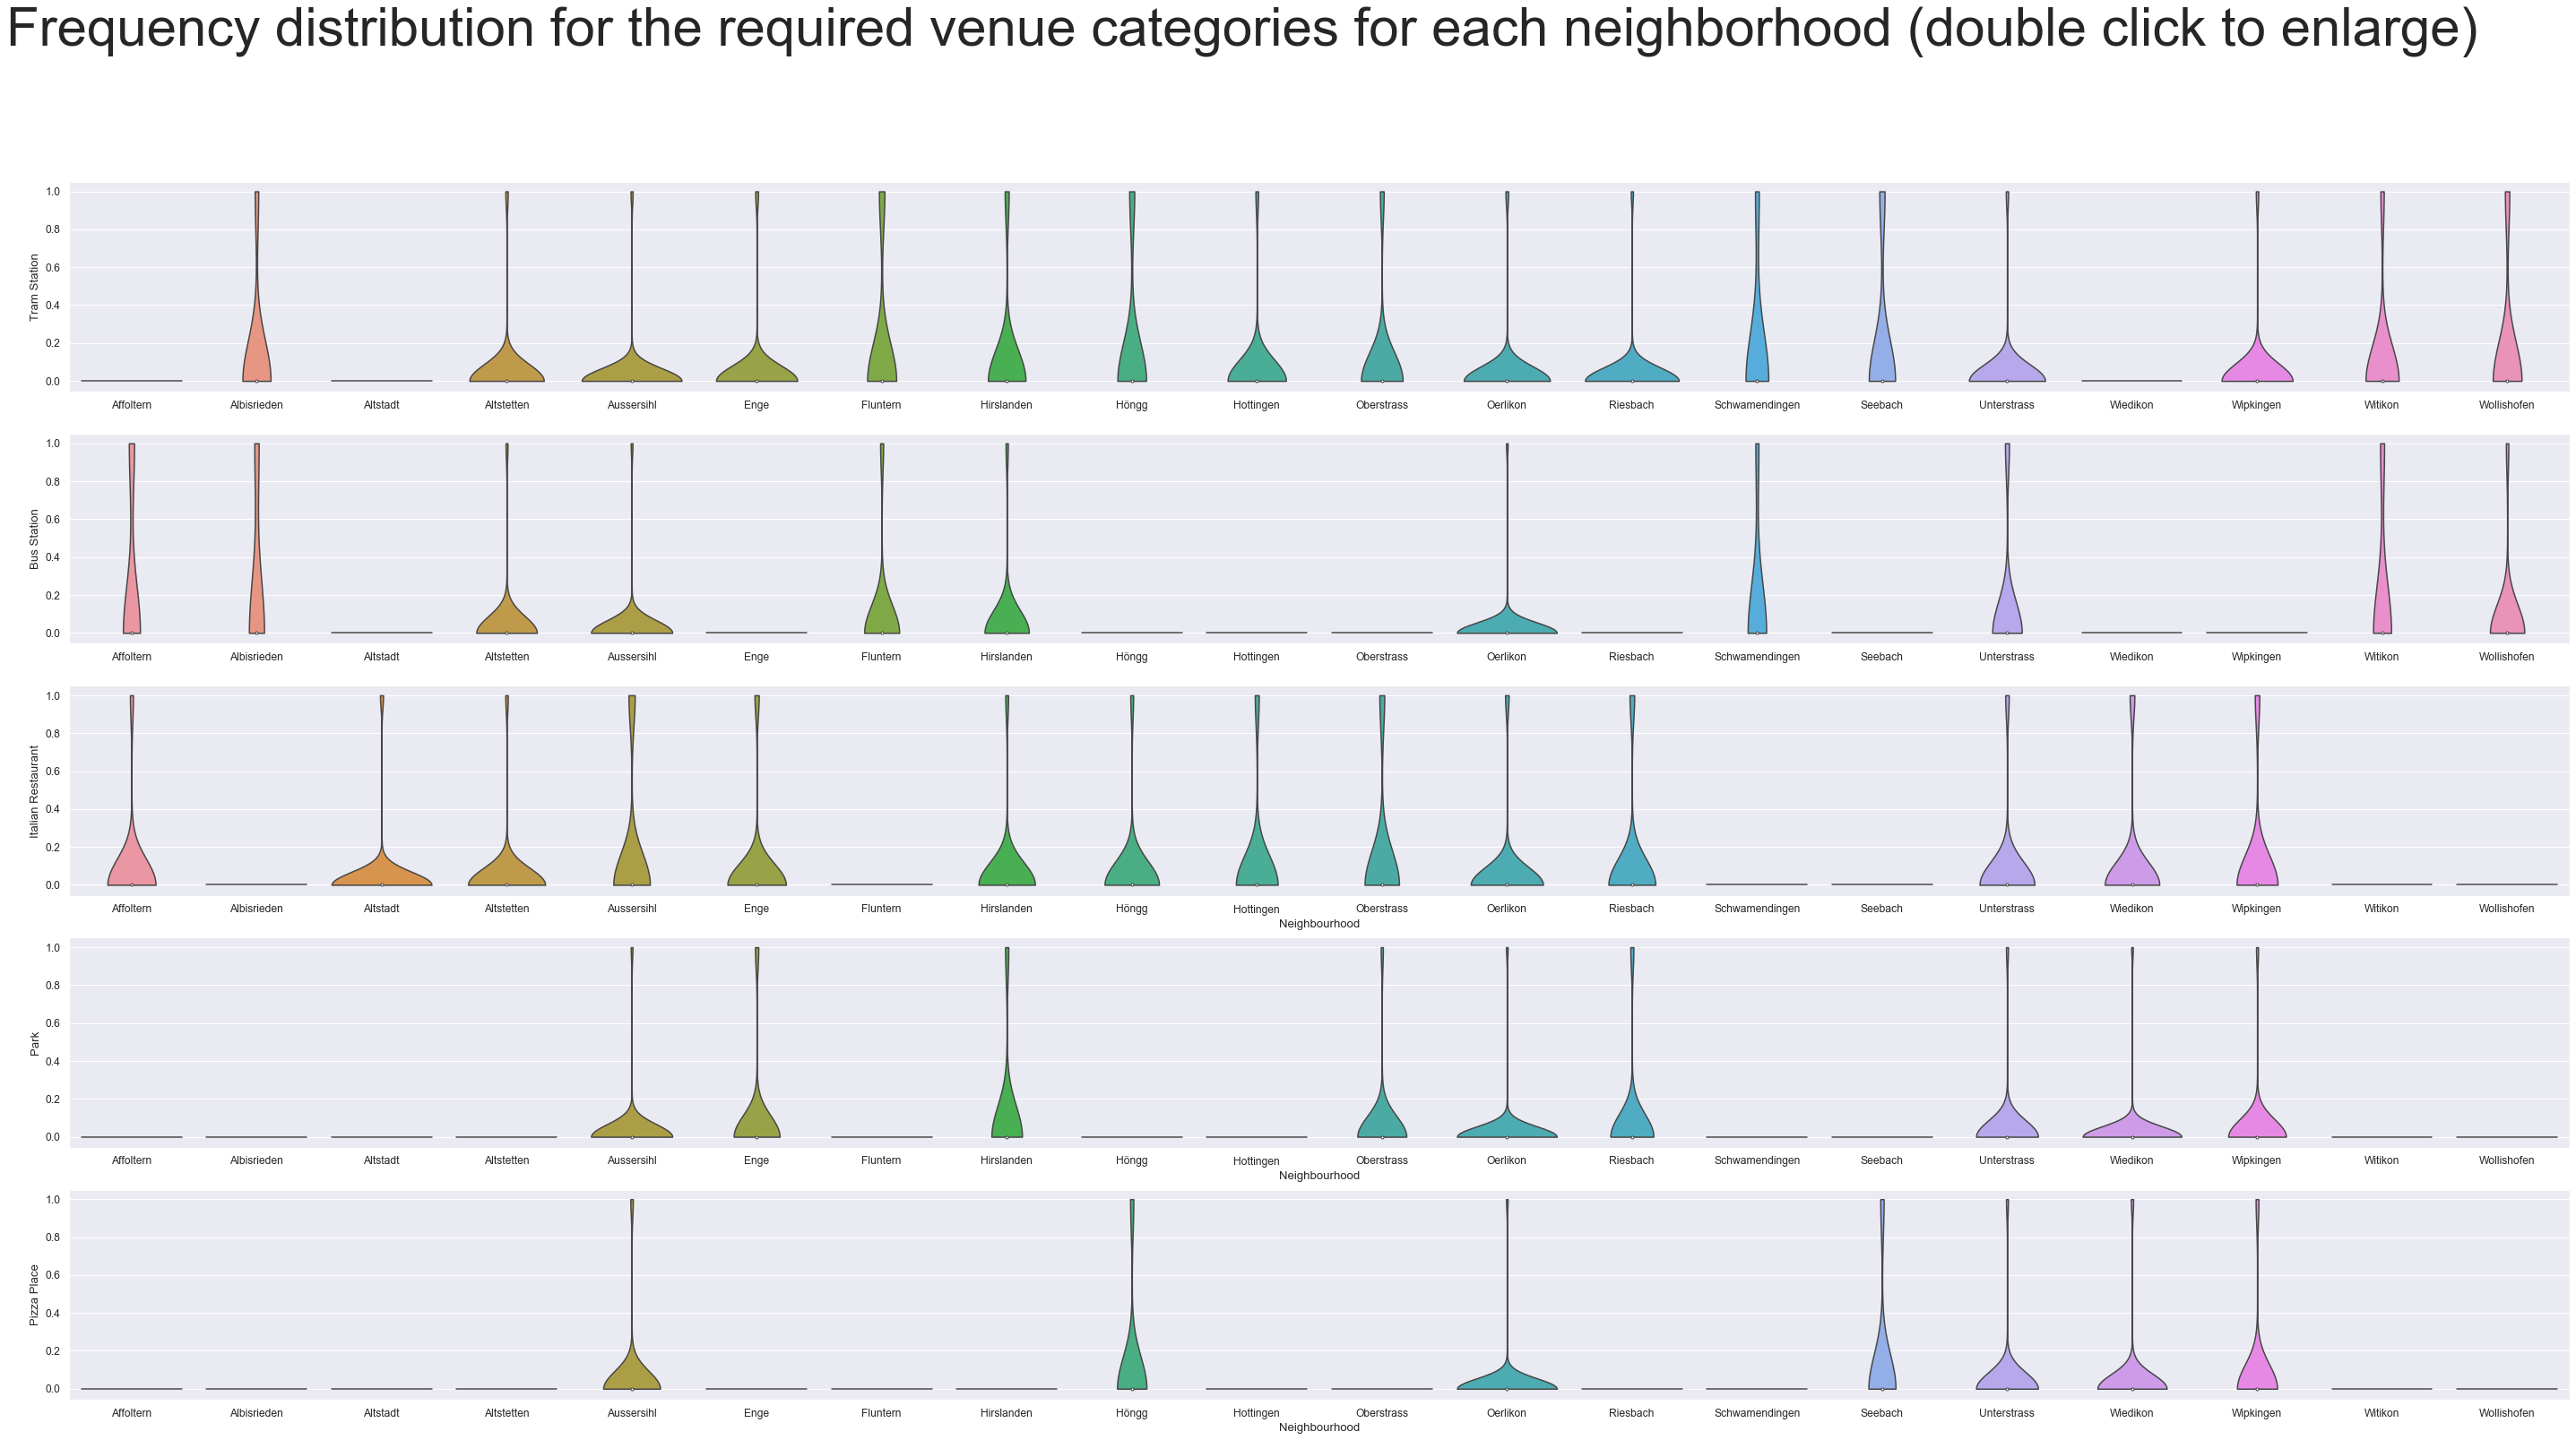

In [409]:
fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(5,1,1)
sns.violinplot(x="Neighbourhood", y="Tram Station", data=zurich_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(5,1,2)
sns.violinplot(x="Neighbourhood", y="Bus Station", data=zurich_onehot, cut=0);
plt.xlabel("")

plt.subplot(5,1,3)
sns.violinplot(x="Neighbourhood", y="Italian Restaurant", data=zurich_onehot, cut=0);

plt.subplot(5,1,4)
sns.violinplot(x="Neighbourhood", y="Park", data=zurich_onehot, cut=0);

plt.subplot(5,1,5)
sns.violinplot(x="Neighbourhood", y="Pizza Place", data=zurich_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the required venue categories for each neighborhood (double click to enlarge)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_5_categories.png", dpi=240)
plt.show()

From the violin plots we can see that the Neighbourhood that meet the client's requirements are Aussersihl, Oerlikon and Unterstrass.
Let's plot only this three neighbourhood to have a better view.

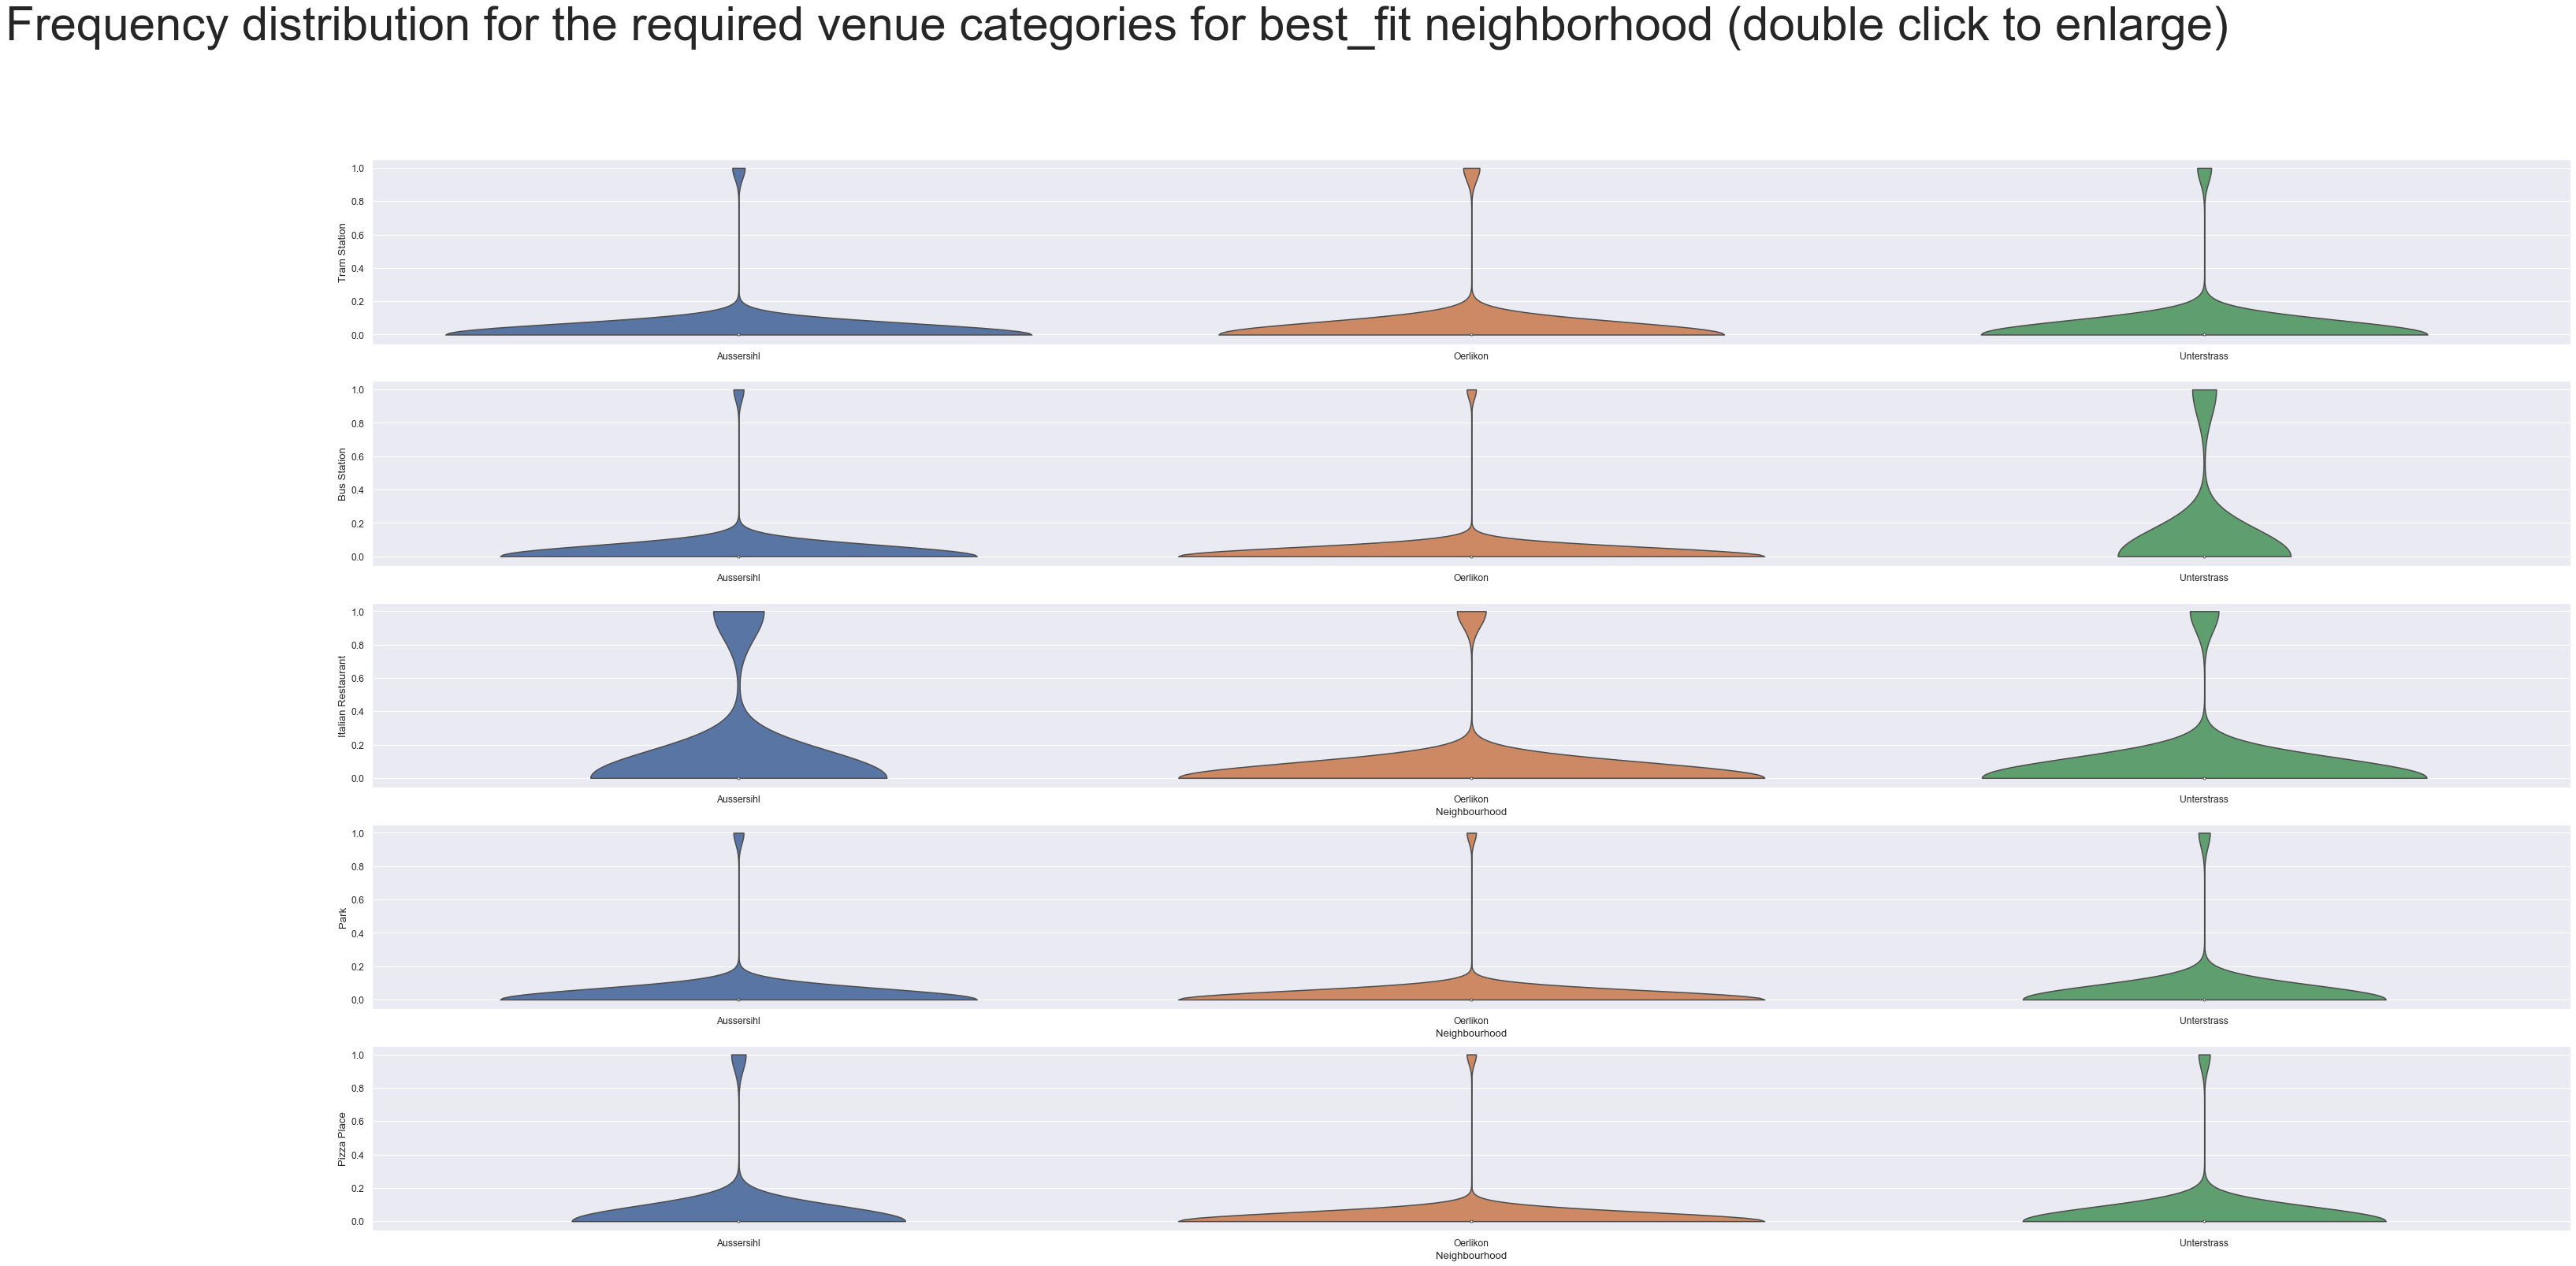

In [488]:
best_neighbourhood=zurich_onehot.loc[(zurich_onehot['Neighbourhood']== 'Aussersihl') | (zurich_onehot['Neighbourhood']== 'Oerlikon') | (zurich_onehot['Neighbourhood']== 'Unterstrass')] 

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(5,1,1)
sns.violinplot(x="Neighbourhood", y="Tram Station", data=best_neighbourhood, cut=0);
plt.xlabel("")

ax = plt.subplot(5,1,2)
sns.violinplot(x="Neighbourhood", y="Bus Station", data=best_neighbourhood, cut=0);
plt.xlabel("")

plt.subplot(5,1,3)
sns.violinplot(x="Neighbourhood", y="Italian Restaurant", data=best_neighbourhood, cut=0);

plt.subplot(5,1,4)
sns.violinplot(x="Neighbourhood", y="Park", data=best_neighbourhood, cut=0);

plt.subplot(5,1,5)
sns.violinplot(x="Neighbourhood", y="Pizza Place", data=best_neighbourhood, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the required venue categories for best_fit neighborhood (double click to enlarge)', fontsize=60)
plt.savefig ("Distribution_Frequency_Best_5_categories.png", dpi=240)
plt.show()

To make a better recommendation I will explore the ratings for the italian restaurants as the MD is very keen on eating good italian food.

In [429]:
#Aussersihl let's examine the rating for the italian restaurant
venues_req_a=venues_df.loc[venues_df['Neighbourhood']== 'Aussersihl']
it_rest_a=venues_req_a.loc[venues_req_a['VenueCategory']== 'Italian Restaurant']
it_rest_a.head()


,District,Neighbourhood,Latitude,Longitude,VenueName,id,VenueLatitude,VenueLongitude,VenueCategory
163,4 and 5,Aussersihl,47.38245,8.500603,Pizzeria Da Cono,4bb9b8a77421a593ccf3c240,47.382623,8.500987,Italian Restaurant
164,4 and 5,Aussersihl,47.38245,8.500603,Da Angela,4b058888f964a520f4cb22e3,47.387032,8.501710,Italian Restaurant
180,4 and 5,Aussersihl,47.38245,8.500603,Azzurro,4df1e85e7d8b18e1722831ca,47.387110,8.500949,Italian Restaurant
195,4 and 5,Aussersihl,47.38245,8.500603,amo' caffè.ristorante.bar,4ce65df9f3bda14302f5aae4,47.386077,8.498550,Italian Restaurant
200,4 and 5,Aussersihl,47.38245,8.500603,Fellini,56fe4c9c498efebb296499e0,47.386040,8.496636,Italian Restaurant


In [450]:
venue_id = '4bb9b8a77421a593ccf3c240'
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/4bb9b8a77421a593ccf3c240?client_id=CPZQ54HG2SZQPN5UIXWMOFFCHWHFVJLWWHIBB3UFM5POCRJ1&client_secret=URA4CYLW3KTZE25L1IGJGLKEDKYORN1WXNLHK543F3XDVUDM&v=20201104'

Send Get request for the result

In [451]:
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'price', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'menu', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'description', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'popular', 'seasonalHours', 'defaultHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors'])


{'id': '4bb9b8a77421a593ccf3c240',
 'name': 'Pizzeria Da Cono',
 'contact': {'phone': '+41444924641', 'formattedPhone': '+41 44 492 46 41'},
 'location': {'address': 'Badenerstrasse',
  'lat': 47.38262311794145,
  'lng': 8.500987129811215,
  'labeledLatLngs': [{'label': 'display',
    'lat': 47.38262311794145,
    'lng': 8.500987129811215}],
  'postalCode': '8048',
  'cc': 'CH',
  'city': 'Zürich',
  'state': 'Zürich',
  'country': 'Schweiz',
  'formattedAddress': ['Badenerstrasse', '8048 Zürich', 'Schweiz']},
 'canonicalUrl': 'https://foursquare.com/v/pizzeria-da-cono/4bb9b8a77421a593ccf3c240',
 'categories': [{'id': '4bf58dd8d48988d110941735',
   'name': 'Italian Restaurant',
   'pluralName': 'Italian Restaurants',
   'shortName': 'Italian',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_',
    'suffix': '.png'},
   'primary': True}],
 'verified': False,
 'stats': {'tipCount': 6},
 'url': 'http://www.dacono.ch',
 'price': {'tier': 2, 'message': 'Moderate',

Get the venue rating

In [452]:
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

7.4


In [480]:
venue_id = '4b058888f964a520f4cb22e3'
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


In [464]:
venue_id = '4df1e85e7d8b18e1722831ca'
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

7.0


In [465]:
venue_id = '4ce65df9f3bda14302f5aae4'
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


In [481]:
venue_id = '56fe4c9c498efebb296499e0'
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


ValueError: only 2 non-keyword arguments accepted

In [418]:
#Oerlikon let's examine the rating for the italian restaurant
venues_req_o=venues_df.loc[venues_df['Neighbourhood']== 'Oerlikon']
it_rest_o=venues_req_o.loc[venues_req_o['VenueCategory']== 'Italian Restaurant']
it_rest_o.head()

,District,Neighbourhood,Latitude,Longitude,VenueName,id,VenueLatitude,VenueLongitude,VenueCategory
386,11,Oerlikon,47.410421,8.544585,concerto,587a4f5175e13712979559b0,47.410266,8.546129,Italian Restaurant
402,11,Oerlikon,47.410421,8.544585,Salt & Pepper,527962d2498ecc6c44951ad3,47.411291,8.545579,Italian Restaurant
420,11,Oerlikon,47.410421,8.544585,Mamma Mia,4bdac1022a3a0f47dbdbabb6,47.410706,8.544801,Italian Restaurant


In [472]:
venue_id = '587a4f5175e13712979559b0'
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

7.5


In [473]:
venue_id = '527962d2498ecc6c44951ad3'
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

7.1


In [474]:
venue_id = '4bdac1022a3a0f47dbdbabb6'
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

6.4


In [483]:
#Unterstrass let's examine the rating for the italian restaurant
venues_req_u=venues_df.loc[venues_df['Neighbourhood']== 'Unterstrass']
it_rest_u=venues_req_u.loc[venues_req_u['VenueCategory']== 'Italian Restaurant']
it_rest_u.head()



,District,Neighbourhood,Latitude,Longitude,VenueName,id,VenueLatitude,VenueLongitude,VenueCategory
513,6,Unterstrass,47.391447,8.539572,Ristorante La casa,4b9787d2f964a5208e0735e3,47.390314,8.539935,Italian Restaurant
521,6,Unterstrass,47.391447,8.539572,Restaurant Scala,4bb32d7135f0c9b62f09bc83,47.391435,8.538400,Italian Restaurant


In [484]:
venue_id = '4b9787d2f964a5208e0735e3'
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

7.7


In [485]:
venue_id = '4bb32d7135f0c9b62f09bc83'
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

6.9
